In [6]:
import pandas as pd

# Corrected path
imdb_df = pd.read_csv(r"C:\Users\master pc\Downloads\Telegram Desktop\imdb_movie_dataset.csv")
amazon_df = pd.read_csv(r"C:\Users\master pc\Downloads\Telegram Desktop\data.csv")


In [7]:
# Step 2: Rename columns in amazon_df to align with imdb_df for easier merging
amazon_df = amazon_df.rename(columns={
    'title': 'Title',
    'type': 'Type',
    'genre': 'Genre',
    'releaseYear': 'Year',
    'imdbId': 'IMDB ID',
    'imdbAverageRating': 'IMDB Average Rating',
    'imdbNumVotes': 'IMDB Number of Votes',
    'availableCountries': 'Available Countries'
})


In [8]:
# Assigning new column names to match the 12 columns 
# Step 3: Standardize imdb_df column names to match the amazon_df structure
imdb_df.columns = [
    'Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 
    'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 
    'Revenue (Millions)', 'Metascore'
]


In [9]:
# Step 4: Convert necessary columns to numeric and handle missing values
# Ensure 'Year' and 'Rating' are numeric in imdb_df
imdb_df['Year'] = pd.to_numeric(imdb_df['Year'], errors="coerce")
imdb_df['Rating'] = pd.to_numeric(imdb_df['Rating'], errors="coerce")

# Ensure 'IMDB Average Rating' is numeric in amazon_df
amazon_df['IMDB Average Rating'] = pd.to_numeric(amazon_df['IMDB Average Rating'], errors="coerce")

In [10]:
# Step 5: Remove rows with missing 'Title' values from both DataFrames before merging
amazon_df.dropna(subset=['Title'], inplace=True)
imdb_df.dropna(subset=['Title'], inplace=True)

In [11]:
# Step 6: Merge the DataFrames on 'Title' with an inner join
inner_merge_df = pd.merge(amazon_df, imdb_df, on='Title', how='inner')

In [12]:
# Step 7: Harmonize duplicate columns ('Year_x', 'Year_y' and 'Genre_x', 'Genre_y') after the merge
# Combine 'Year_x' and 'Year_y' into a single 'Year' column
if 'Year_x' in inner_merge_df.columns and 'Year_y' in inner_merge_df.columns:
    inner_merge_df['Year'] = inner_merge_df['Year_x'].combine_first(inner_merge_df['Year_y'])
    inner_merge_df = inner_merge_df.drop(columns=['Year_x', 'Year_y'])

# Combine 'Genre_x' and 'Genre_y' into a single 'Genre' column
if 'Genre_x' in inner_merge_df.columns and 'Genre_y' in inner_merge_df.columns:
    inner_merge_df['Genre'] = inner_merge_df['Genre_x'].combine_first(inner_merge_df['Genre_y'])
    inner_merge_df = inner_merge_df.drop(columns=['Genre_x', 'Genre_y'])

In [13]:
# Step 8: Final check of the merged DataFrame columns and data types
print("Final columns in inner_merge_df:\n", inner_merge_df.columns)
print(inner_merge_df.dtypes)

('Final columns in inner_merge_df:\n', Index([u'Title', u'Type', u'genres', u'IMDB ID', u'IMDB Average Rating',
       u'IMDB Number of Votes', u'Available Countries', u'Rank', u'Genre',
       u'Description', u'Director', u'Actors', u'Runtime (Minutes)', u'Rating',
       u'Votes', u'Revenue (Millions)', u'Metascore', u'Year'],
      dtype='object'))
Title                    object
Type                     object
genres                   object
IMDB ID                  object
IMDB Average Rating     float64
IMDB Number of Votes    float64
Available Countries      object
Rank                      int64
Genre                    object
Description              object
Director                 object
Actors                   object
Runtime (Minutes)         int64
Rating                  float64
Votes                     int64
Revenue (Millions)      float64
Metascore               float64
Year                    float64
dtype: object


In [14]:
# Step 9: Data Analysis
# Calculate average imdb rating for each genre
genre_ratings = inner_merge_df.groupby('Genre')['IMDB Average Rating'].mean().sort_values(ascending=False)

# Display top genres by rating
print('Top Genres By Average IMDB Rating:\n', genre_ratings.head(10))

('Top Genres By Average IMDB Rating:\n', Genre
Drama,Western              8.50
Adventure,Drama,War        8.40
Adventure,Drama,Sci-Fi     8.35
Drama,Mystery,War          8.30
Drama,Fantasy,War          8.20
Biography,Comedy,Crime     8.20
Drama,Family               8.10
Drama,Music                7.95
Crime,Drama,History        7.90
Biography,Drama,Mystery    7.70
Name: IMDB Average Rating, dtype: float64)


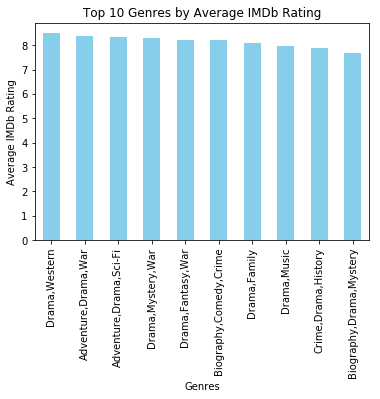

In [15]:
# Step 10: Data Visualization
# Visualize tp genres by average rating using a bar plot
import matplotlib.pyplot as plt
top_genres = genre_ratings.head(10)
top_genres.plot(kind='bar', color='skyblue', title='Top 10 Genres by Average IMDb Rating')
plt.xlabel('Genres')
plt.ylabel('Average IMDb Rating')
plt.show()


In [22]:
# Step 11: Additional Analysis (Optional for extended time)
# Calculate average runtime by genre
genre_runtime = inner_merge_df.groupby('Genre')['Runtime (Minutes)'].mean().sort_values(ascending=False)

print("\nTop Genres by Average Runtime:\n", genre_runtime.head(10))


('\nTop Genres by Average Runtime:\n', Genre
Biography,Comedy,Crime      180.0
Drama,Sci-Fi                172.0
Drama,Western               165.0
Action,Drama,Mystery        162.0
Adventure,Drama,History     161.0
Adventure,Fantasy           158.0
Drama,Musical,Romance       158.0
Adventure,Drama,Sci-Fi      156.5
Adventure,Drama,War         153.0
Mystery,Thriller,Western    148.0
Name: Runtime (Minutes), dtype: float64)


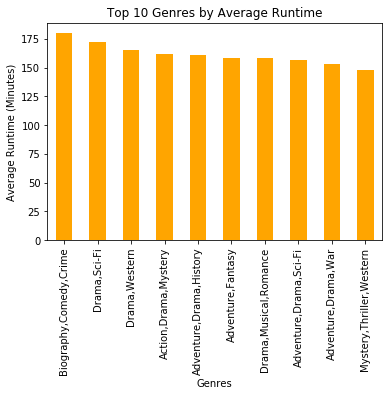

In [20]:
# Plot for average runtime by genre
top_runtimes = genre_runtime.head(10)
top_runtimes.plot(kind='bar', color='orange', title='Top 10 Genres by Average Runtime')
plt.xlabel('Genres')
plt.ylabel('Average Runtime (Minutes)')
plt.show()

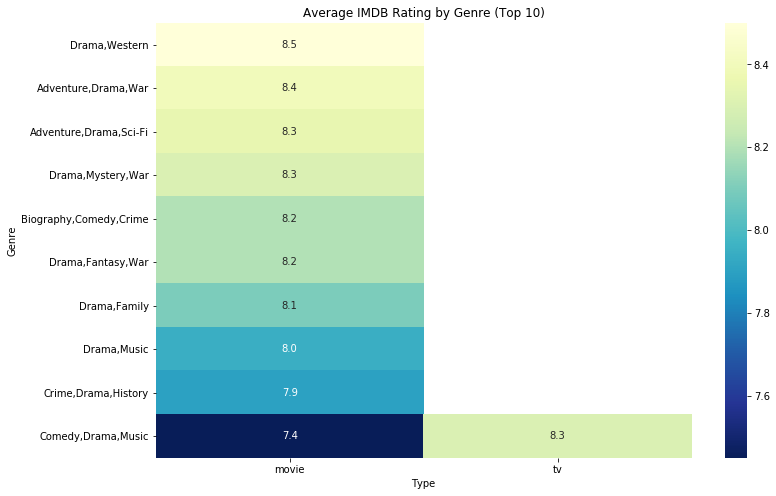

In [29]:
# calculate average IMDb rating per genre and type
pivot_top_10_genres = inner_merge_df.pivot_table(
index='Genre',
columns='Type',
values='IMDB Average Rating',
aggfunc='mean'
)

# sort the genres by average IMDb rating and select the top 10
top_10_genres = pivot_top_10_genres.mean(axis=1).sort_values(ascending=False).head(10).index
pivot_top_10_filtered = pivot_top_10_genres.loc[top_10_genres]

# create the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(pivot_top_10_filtered, annot=True, cmap='YlGnBu_r', fmt='.1f')
plt.title('Average IMDB Rating by Genre (Top 10)')
plt.xlabel('Type')
plt.ylabel('Genre')
plt.show()

In [32]:
# sample merged_df dataframe
inner_merge_df = pd.read_csv(r"C:\Users\master pc\Documents\HN\Regonet - Data Analytics with Python\Assignments\merged_data.csv") # load data

In [35]:
print(inner_merge_df.columns)


Index([u'Title', u'Type', u'Genres', u'Release Year', u'IMDb ID',
       u'IMDb Average Rating', u'IMDb Number of Votes', u'Available Countries',
       u'Rank', u'Description', u'Director', u'Actors', u'Runtime (Minutes)',
       u'Revenue (Millions)', u'Metascore'],
      dtype='object')


In [38]:
# Step 12: Basic Pivot table - Average IMDB Rating by Genre and Type
pivot_genre_type = inner_merge_df.pivot_table(
    index='Genres', 
    columns='Type', 
    values='IMDb Average Rating', 
    aggfunc='mean'
).head(10)
print('Average IMDb Rating by Genre and Type:\n', pivot_genre_type)

('Average IMDb Rating by Genre and Type:\n', Type                             movie   tv
Genres                                     
Action                        4.933333  NaN
Action, Adventure             4.000000  NaN
Action, Adventure, Animation  7.580000  NaN
Action, Adventure, Biography  7.000000  NaN
Action, Adventure, Comedy     6.246154  NaN
Action, Adventure, Crime      5.816667  6.5
Action, Adventure, Drama      6.213043  NaN
Action, Adventure, Family     6.450000  NaN
Action, Adventure, Fantasy    5.376471  NaN
Action, Adventure, Horror     5.150000  NaN)


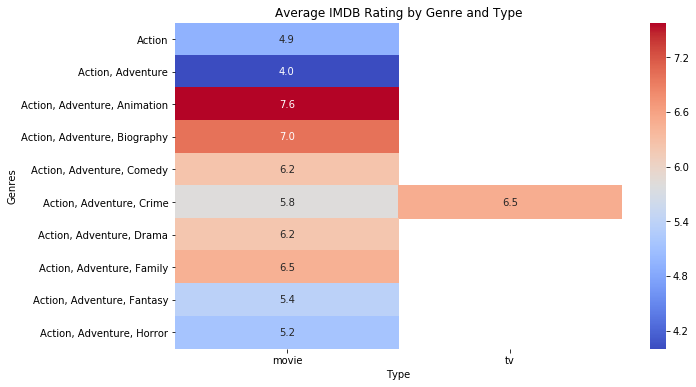

In [41]:
# visualization:Heat map for Average IMDb Rating by Genre and type
plt.figure(figsize=(10,6))
sns.heatmap(pivot_genre_type, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Average IMDB Rating by Genre and Type')
plt.show()